# **Game Winner Prediction**

# Problem Statement
* **Task 1**:-Prepare a complete data analysis report on the given data.

* **Task 2**:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.


# Task-1:Data Analysis Report(Exploratory Data Analysis-EDA)



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('pubg.csv')

In [ ]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0.0,0.0000,0.0,0.00,0.0,0.0,34.70,1.0,0.0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0.0,0.0000,0.0,0.00,0.0,0.0,13.50,1.0,1497.0,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0.0,2004.0000,0.0,0.00,0.0,0.0,1089.00,6.0,1500.0,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0.0,0.0000,0.0,0.00,0.0,0.0,799.90,4.0,0.0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0.0,0.0000,0.0,0.00,0.0,0.0,65.67,1.0,0.0,0.2143


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91907 entries, 0 to 91906
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               91907 non-null  object 
 1   groupId          91907 non-null  object 
 2   matchId          91907 non-null  object 
 3   assists          91907 non-null  int64  
 4   boosts           91907 non-null  int64  
 5   damageDealt      91907 non-null  float64
 6   DBNOs            91907 non-null  int64  
 7   headshotKills    91907 non-null  int64  
 8   heals            91907 non-null  int64  
 9   killPlace        91907 non-null  int64  
 10  killPoints       91907 non-null  int64  
 11  kills            91907 non-null  int64  
 12  killStreaks      91906 non-null  float64
 13  longestKill      91906 non-null  float64
 14  matchDuration    91906 non-null  float64
 15  matchType        91906 non-null  object 
 16  maxPlace         91906 non-null  float64
 17  numGroups   

In [ ]:
df.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
df.shape

(91907, 29)

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-8-0c8fdc0ed345>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-8-0c8fdc0ed345>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
df.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,91907.0,0.233780,0.588047,0.0,0.0,0.0000,0.0000,13.0
boosts,91907.0,1.119458,1.723788,0.0,0.0,0.0000,2.0000,21.0
damageDealt,91907.0,130.611474,170.075118,0.0,0.0,83.6800,185.8000,3725.0
DBNOs,91907.0,0.654368,1.142991,0.0,0.0,0.0000,1.0000,32.0
headshotKills,91907.0,0.222834,0.587819,0.0,0.0,0.0000,0.0000,17.0
heals,91907.0,1.371136,2.664693,0.0,0.0,0.0000,2.0000,47.0
killPlace,91907.0,47.589868,27.492171,1.0,24.0,47.0000,71.0000,100.0
killPoints,91907.0,504.596951,626.738777,0.0,0.0,0.0000,1170.0000,2140.0
kills,91907.0,0.924010,1.549941,0.0,0.0,0.0000,1.0000,35.0
killStreaks,91907.0,0.544154,0.713558,0.0,0.0,0.0000,1.0000,10.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(['Id', 'groupId', 'matchId'], axis=1)


In [ ]:
df['matchType'] = df['matchType'].astype(str)

# **Univarient Analysis**

Text(0.5, 1.0, 'Distribution of Walk Distance')

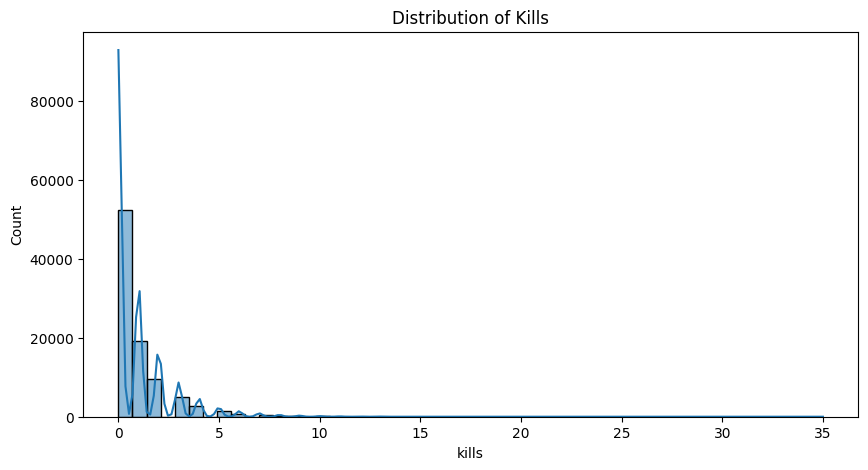

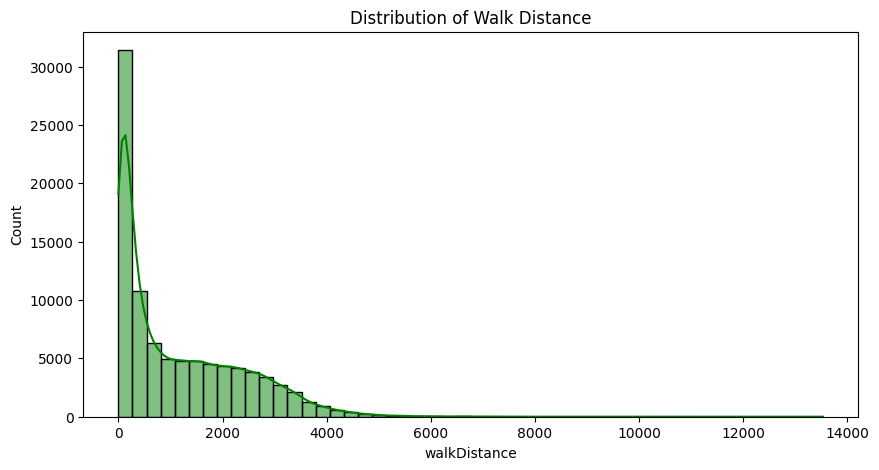

In [ ]:

# Distribution of kills
plt.figure(figsize=(10,5))
sns.histplot(df['kills'], bins=50, kde=True)
plt.title("Distribution of Kills")

# Distribution of walk distance
plt.figure(figsize=(10,5))
sns.histplot(df['walkDistance'], bins=50, color='green', kde=True)
plt.title("Distribution of Walk Distance")


# **Bivariate Analysis**

Text(0.5, 1.0, 'Total Distance vs Win Placement Percentage')

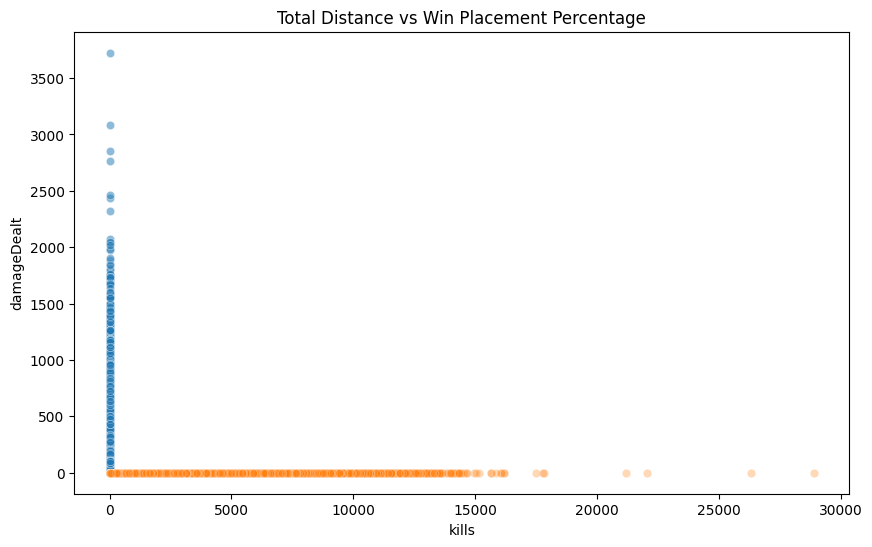

In [ ]:

# Kills vs Damage Dealt
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='kills', y='damageDealt', alpha=0.5)
plt.title("Kills vs Damage Dealt")

# Total Distance vs Win %
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
sns.scatterplot(data=df, x='totalDistance', y='winPlacePerc', alpha=0.3)
plt.title("Total Distance vs Win Placement Percentage")


In [ ]:
#We get error when we try to find corelation, so
# Convert with error handling
#If we want to find the corelation, we need to convert all the columns into numerical
#
df= df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isnull().sum()

,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0
killPoints,0
kills,0
killStreaks,0


In [ ]:
df['matchType'] = df['matchType'].astype(str)

In [ ]:
df.isnull().sum()

,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0
killPoints,0
kills,0
killStreaks,0


# **Corelation Analysis**

Top features correlated with winPlacePerc:
winPlacePerc       1.000000
walkDistance       0.810981
totalDistance      0.677573
boosts             0.634926
weaponsAcquired    0.585249
damageDealt        0.442898
heals              0.431099
kills              0.420094
longestKill        0.410513
killStreaks        0.376519
Name: winPlacePerc, dtype: float64


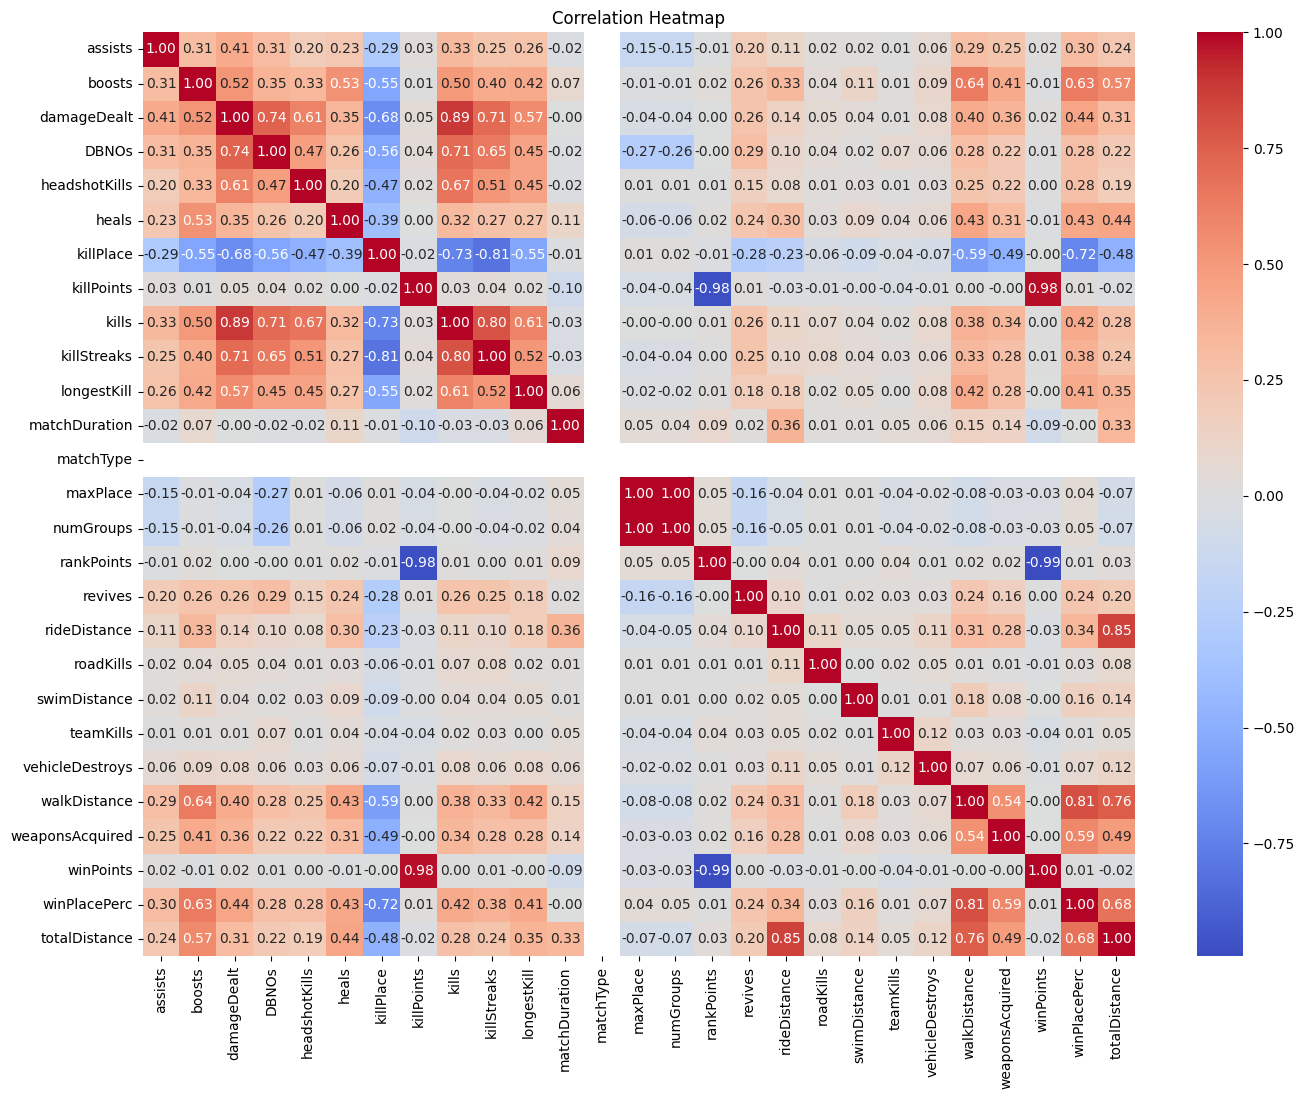

In [ ]:
#Corelation Analysis
# Correlation heatmap
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")

# Top correlations with winPlacePerc
corr_target = corr['winPlacePerc'].sort_values(ascending=False)
print("Top features correlated with winPlacePerc:")
print(corr_target.head(10))


# Match types distribution

Text(0.5, 1.0, 'Match Types Distribution')

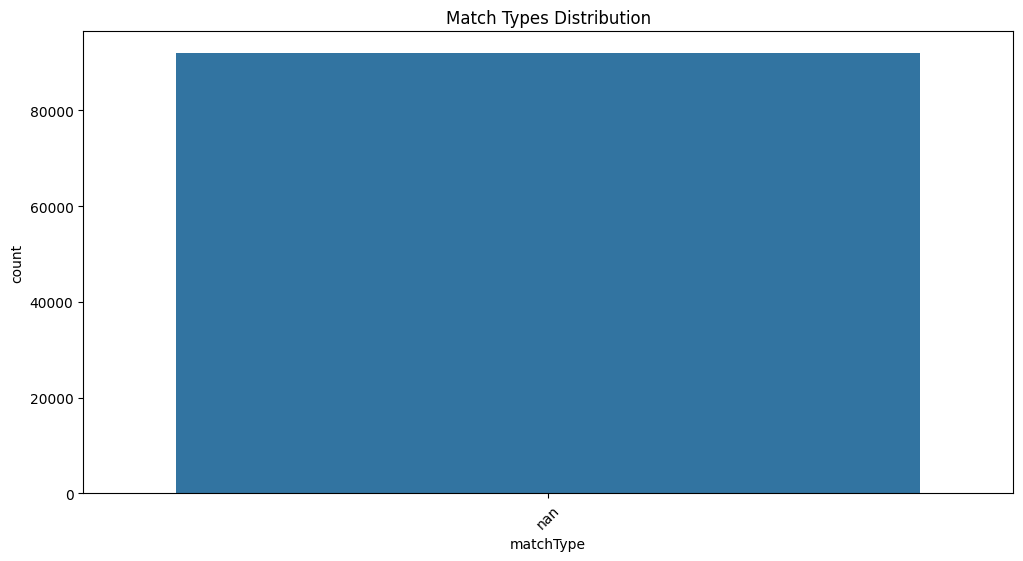

In [ ]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='matchType')
plt.xticks(rotation=45)
plt.title("Match Types Distribution")


# Average win percentage by match type

Text(0.5, 1.0, 'Avg Win % by Match Type')

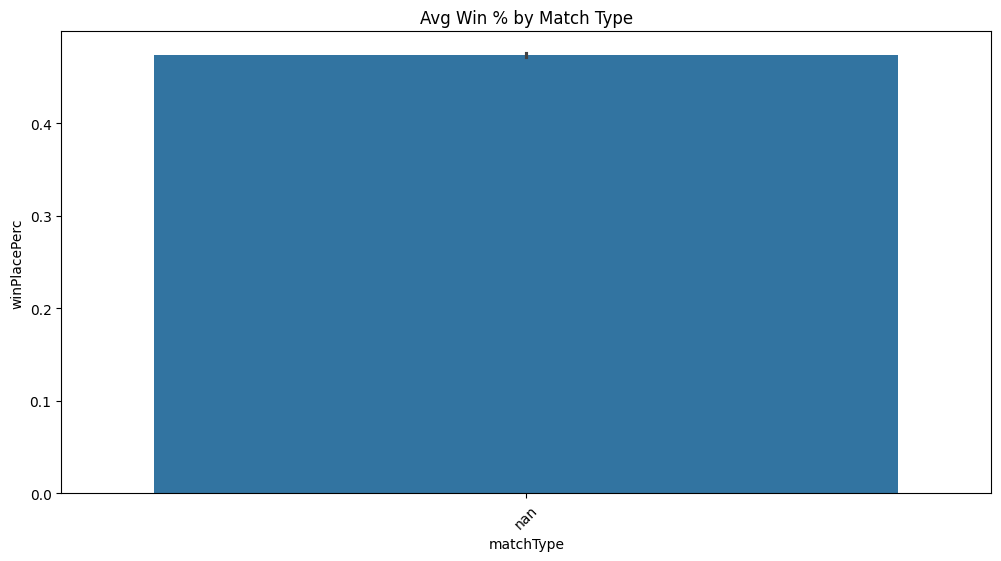

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='matchType', y='winPlacePerc')
plt.xticks(rotation=45)
plt.title("Avg Win % by Match Type")

#Task_2 Predictive Modeling (Win Probability Estimation)
**Define the Problem**
* **Goal: Predict winPlacePerc (value from 0 to 1)**
* **It’s a regression problem**

In [ ]:
#Encoding categorical columns:
df = pd.get_dummies(df, columns=['matchType'])


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('winPlacePerc',axis=1)
y=df['winPlacePerc']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
pip install xgboost

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)  # Remove squared parameter
rmse = np.sqrt(mse)  # Calculate RMSE manually

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.09094116416205414
R2 Score: 0.9122400229396468


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression RMSE: 0.1268714185105727
Linear Regression R²: 0.8291940192392214


# **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R²:", r2_xgb)

XGBoost RMSE: 0.0868629948330639
XGBoost R²: 0.9199345627606507


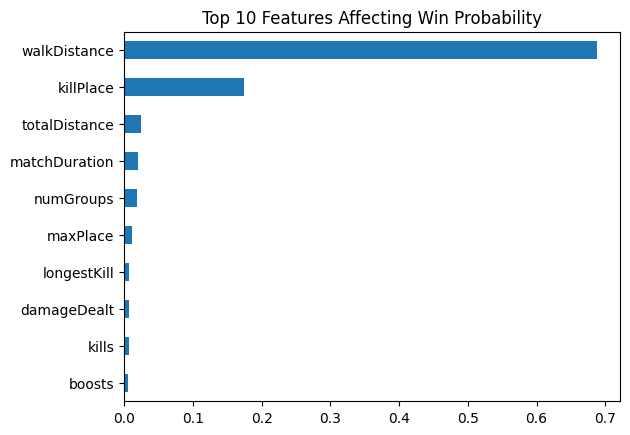

In [ ]:
importances = model.feature_importances_
features = X.columns

# Plot top 10 features
feat_df = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_df.plot(kind='barh')
plt.title("Top 10 Features Affecting Win Probability")
plt.gca().invert_yaxis()

# **Checking Winning Probability**

1. **Predict for Test Set(Bulk Predictions)**

In [ ]:
# Predict win probabilities for all test data
win_predictions = rf.predict(X_test)

# Example: First 5 predicted win probabilities
print(win_predictions[:5])


[0.768077 0.500155 0.093404 0.139335 0.13129 ]


2. **Predict for a Single Player(Manual Input)**

Create a new player record

In [ ]:
new_player = pd.DataFrame([{
    'assists': 2,
    'boosts': 3,
    'damageDealt': 250.0,
    'DBNOs': 1,
    'headshotKills': 1,
    'heals': 2,
    'killPlace': 15,
    'killPoints': 1234,
    'kills': 3,
    'killStreaks': 1, # Added killStreaks
    'longestKill': 80.0,
    'matchDuration': 1800,
    'maxPlace': 100,
    'numGroups': 50,
    'rankPoints': 1500, # Added rankPoints
    'revives': 0,
    'rideDistance': 1200.0,
    'roadKills': 0,
    'swimDistance': 0.0,
    'teamKills': 0,
    'vehicleDestroys': 0,
    'walkDistance': 1300.0,
    'weaponsAcquired': 5, # Added weaponsAcquired
    'winPoints': 1500, # Added winPoints
    'totalDistance': 1300.0 + 1200.0 + 0.0, # Added totalDistance
    'matchType_nan': True # Added encoded matchType (assuming the match type in the original data was NaN based on previous steps)
}])

# Ensure the columns are in the same order as X_train
new_player = new_player[X_train.columns]

# Predict win probability
# Assuming 'model' refers to the trained RandomForestRegressor 'rf'
win_prob = rf.predict(new_player)[0]
win_prob=win_prob*100
print("Predicted Win Probability:", round(win_prob, 3))

Predicted Win Probability: 74.514
